In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as plot

In [2]:
vacinations_df = pd.read_csv("country_vaccinations_raw.csv")
cases_deaths_df = pd.read_csv("worldometer_coronavirus_daily_data_raw.csv")

In [3]:
vacinations_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4673,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4674,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4675,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4676,Zimbabwe,ZWE,2021-02-28,18843.0,18843.0,NaN,3138.0,2551.0,0.13,0.13,NaN,172.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...


In [4]:
cleaned_vacinations_df = vacinations_df.drop(["iso_code", 'daily_vaccinations_raw', "source_name", "source_website", "daily_vaccinations_per_million", "people_fully_vaccinated_per_hundred", "people_vaccinated_per_hundred", "total_vaccinations_per_hundred"], axis=1)

In [5]:
cleaned_vacinations_df.dtypes

country                     object
date                        object
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
daily_vaccinations         float64
vaccines                    object
dtype: object

In [6]:
cleaned_vacinations_df['date'] = pd.to_datetime(cleaned_vacinations_df["date"])

In [7]:
cleaned_vacinations_df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines
0,Albania,2021-01-10,0.0,0.0,NaN,NaN,Pfizer/BioNTech
1,Albania,2021-01-11,NaN,NaN,NaN,64.0,Pfizer/BioNTech
2,Albania,2021-01-12,128.0,128.0,NaN,64.0,Pfizer/BioNTech
3,Albania,2021-01-13,188.0,188.0,NaN,63.0,Pfizer/BioNTech
4,Albania,2021-01-14,266.0,266.0,NaN,66.0,Pfizer/BioNTech
...,...,...,...,...,...,...,...
4673,Zimbabwe,2021-02-25,11007.0,11007.0,NaN,1572.0,Sinopharm/Beijing
4674,Zimbabwe,2021-02-26,12579.0,12579.0,NaN,1750.0,Sinopharm/Beijing
4675,Zimbabwe,2021-02-27,15705.0,15705.0,NaN,2150.0,Sinopharm/Beijing
4676,Zimbabwe,2021-02-28,18843.0,18843.0,NaN,2551.0,Sinopharm/Beijing


In [8]:
cases_deaths_df

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
82801,2021-2-22,Zimbabwe,35862.0,66.0,2205.0,1441.0,5.0
82802,2021-2-23,Zimbabwe,35910.0,48.0,2174.0,1448.0,7.0
82803,2021-2-24,Zimbabwe,35960.0,50.0,2094.0,1456.0,8.0
82804,2021-2-25,Zimbabwe,35994.0,34.0,2081.0,1458.0,2.0


In [9]:
cleaned_cases_deaths_df = cases_deaths_df[cases_deaths_df["date"] > "2021-1-01"]
cleaned_cases_deaths_df['country'] = cleaned_cases_deaths_df['country'].replace("USA", "United States")
cleaned_cases_deaths_df['country'] = cleaned_cases_deaths_df['country'].replace("UK", "United Kingdom")

C:\users\zarre\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\users\zarre\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
cleaned_cases_deaths_df['date'] = pd.to_datetime(cleaned_cases_deaths_df["date"])

C:\users\zarre\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
cleaned_cases_deaths_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean Netherlands', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China Hong Kong Sar', 'China Macao Sar', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Cote D Ivoire', 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic Of The Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Gu

In [12]:
combined_df = pd.merge(cleaned_vacinations_df, cleaned_cases_deaths_df, how='inner', on=("country", 'date'))

In [13]:
combined_df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,Albania,2021-01-10,0.0,0.0,NaN,NaN,Pfizer/BioNTech,63595.0,562.0,24706.0,1241.0,8.0
1,Albania,2021-01-11,NaN,NaN,NaN,64.0,Pfizer/BioNTech,63971.0,376.0,24743.0,1247.0,6.0
2,Albania,2021-01-12,128.0,128.0,NaN,64.0,Pfizer/BioNTech,64627.0,656.0,24954.0,1252.0,5.0
3,Albania,2021-01-13,188.0,188.0,NaN,63.0,Pfizer/BioNTech,65334.0,707.0,25218.0,1256.0,4.0
4,Albania,2021-01-14,266.0,266.0,NaN,66.0,Pfizer/BioNTech,65994.0,660.0,25487.0,1261.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3666,Zimbabwe,2021-02-22,1314.0,1314.0,NaN,328.0,Sinopharm/Beijing,35862.0,66.0,2205.0,1441.0,5.0
3667,Zimbabwe,2021-02-23,4041.0,4041.0,NaN,808.0,Sinopharm/Beijing,35910.0,48.0,2174.0,1448.0,7.0
3668,Zimbabwe,2021-02-24,7872.0,7872.0,NaN,1312.0,Sinopharm/Beijing,35960.0,50.0,2094.0,1456.0,8.0
3669,Zimbabwe,2021-02-25,11007.0,11007.0,NaN,1572.0,Sinopharm/Beijing,35994.0,34.0,2081.0,1458.0,2.0


In [14]:
 # Drop the null columns where all values are null
clean_data = combined_df.dropna(axis='columns', how='all')
# Drop the null rows
clean_data = clean_data.dropna()

In [15]:
clean_data["country"].value_counts()

Israel                  54
United Kingdom          49
Chile                   45
Germany                 44
Denmark                 43
Norway                  41
Italy                   41
Romania                 41
Mexico                  41
Bulgaria                40
Hungary                 40
Slovenia                40
United States           40
Belgium                 40
Slovakia                40
Austria                 39
Lithuania               38
Greece                  37
Poland                  37
Portugal                36
Argentina               35
Latvia                  35
Malta                   34
France                  32
Finland                 30
Spain                   30
Estonia                 28
Gibraltar               27
Indonesia               26
Oman                    25
Luxembourg              24
Ireland                 23
Brazil                  21
Seychelles              16
Iceland                 16
Turkey                  15
India                   13
C

In [16]:
total_by_country=clean_data.groupby(["country"])["people_fully_vaccinated"].max().sort_values(ascending=False)

In [17]:
countries = ["United States", "Israel", "Germany","Italy","United Kingdom","Romania","Mexico", "Chile", "Denmark", "Belgium"]

In [18]:
countries

['United States',
 'Israel',
 'Germany',
 'Italy',
 'United Kingdom',
 'Romania',
 'Mexico',
 'Chile',
 'Denmark',
 'Belgium']

In [19]:
final_df = clean_data[clean_data['country'].isin(countries)]

In [20]:
final_df['country'].value_counts()

Israel            54
United Kingdom    49
Chile             45
Germany           44
Denmark           43
Mexico            41
Italy             41
Romania           41
United States     40
Belgium           40
Name: country, dtype: int64

In [21]:
final_df.to_csv("Final_Clean_Data.csv")

In [22]:
final_df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
412,Belgium,2021-01-18,134407.0,134298.0,109.0,14538.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",678839.0,1630.0,611445.0,20435.0,39.0
413,Belgium,2021-01-19,153631.0,153341.0,290.0,15067.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",679771.0,932.0,611973.0,20472.0,37.0
414,Belgium,2021-01-20,174654.0,173942.0,712.0,15073.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",681250.0,1479.0,613181.0,20554.0,82.0
415,Belgium,2021-01-21,204483.0,203771.0,712.0,16080.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",684256.0,3006.0,616169.0,20572.0,18.0
416,Belgium,2021-01-22,233671.0,232928.0,743.0,16951.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",686827.0,2571.0,618532.0,20620.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3651,United States,2021-02-22,64177474.0,44138118.0,19438495.0,1446445.0,"Moderna, Pfizer/BioNTech",28829332.0,59624.0,9201798.0,513394.0,1378.0
3652,United States,2021-02-23,65032083.0,44544969.0,19882544.0,1401674.0,"Moderna, Pfizer/BioNTech",28902002.0,72670.0,9160072.0,515838.0,2444.0
3653,United States,2021-02-24,66464947.0,45237143.0,20607261.0,1454731.0,"Moderna, Pfizer/BioNTech",28977573.0,75571.0,9118705.0,518371.0,2533.0
3654,United States,2021-02-25,68274117.0,46074392.0,21555117.0,1505193.0,"Moderna, Pfizer/BioNTech",29056287.0,78714.0,9094502.0,520836.0,2465.0


In [23]:
df_Israel = final_df[final_df['country']=='Israel']
df_Israel.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
1754,Israel,2021-01-04,1446128.0,1446126.0,2.0,131418.0,"Moderna, Pfizer/BioNTech",448173.0,9304.0,53912.0,3445.0,29.0
1755,Israel,2021-01-05,1572867.0,1572865.0,2.0,127043.0,"Moderna, Pfizer/BioNTech",456139.0,7966.0,58933.0,3495.0,50.0
1756,Israel,2021-01-06,1677687.0,1677685.0,2.0,119976.0,"Moderna, Pfizer/BioNTech",463448.0,7309.0,61553.0,3527.0,32.0
1757,Israel,2021-01-07,1795137.0,1795132.0,5.0,113950.0,"Moderna, Pfizer/BioNTech",471048.0,7600.0,64583.0,3552.0,25.0
1758,Israel,2021-01-08,1862283.0,1862275.0,8.0,113238.0,"Moderna, Pfizer/BioNTech",477357.0,6309.0,65008.0,3596.0,44.0


In [24]:
days_country={}
filter_vac=2
for country in final_df['country'].unique():
    print(country)
    days_country[country]=list(final_df['daily_vaccinations'][(final_df['country']==country) & (final_df['people_fully_vaccinated']>filter_vac)].values)

Belgium
Chile
Denmark
Germany
Israel
Italy
Mexico
Romania
United Kingdom
United States


In [25]:
n_max=0
for k,v in days_country.items():
    print(f"{k} has {len(v)}")
    if len(v) > n_max:
        n_max=len(v)
print(n_max)

Belgium has 40
Chile has 45
Denmark has 43
Germany has 44
Israel has 51
Italy has 41
Mexico has 41
Romania has 41
United Kingdom has 49
United States has 40
51


In [26]:
49-40


9

In [27]:
for k,v in days_country.items():
    print(f"{k} has {len(v)}")
    if len(v) < n_max:
        for i in range(0,n_max-len(v)):
            days_country[k].insert(0,0)
days_country

Belgium has 40
Chile has 45
Denmark has 43
Germany has 44
Israel has 51
Italy has 41
Mexico has 41
Romania has 41
United Kingdom has 49
United States has 40


{'Belgium': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  14538.0,
  15067.0,
  15073.0,
  16080.0,
  16951.0,
  17389.0,
  17187.0,
  17224.0,
  16248.0,
  15546.0,
  14467.0,
  13136.0,
  12602.0,
  12462.0,
  11948.0,
  13457.0,
  15248.0,
  16597.0,
  17948.0,
  18218.0,
  18535.0,
  18843.0,
  19348.0,
  18755.0,
  19160.0,
  19699.0,
  19984.0,
  19813.0,
  20296.0,
  18567.0,
  17742.0,
  16456.0,
  15797.0,
  15335.0,
  15353.0,
  15052.0,
  15437.0,
  15526.0,
  15388.0,
  14286.0],
 'Chile': [0,
  0,
  0,
  0,
  0,
  0,
  147.0,
  1135.0,
  1625.0,
  1638.0,
  1638.0,
  3215.0,
  5975.0,
  7158.0,
  6607.0,
  6176.0,
  6163.0,
  6163.0,
  4788.0,
  2116.0,
  791.0,
  354.0,
  296.0,
  296.0,
  296.0,
  94.0,
  1885.0,
  26185.0,
  51308.0,
  75453.0,
  79431.0,
  80657.0,
  113910.0,
  149276.0,
  164949.0,
  176054.0,
  184636.0,
  184874.0,
  184286.0,
  188884.0,
  183029.0,
  169841.0,
  155721.0,
  143264.0,
  140421.0,
  139950.0,
  117530.0,
  99573.0,
  8507

In [28]:
# test_s=[2,3,4]
# test_s.insert(0,0)
# test_s

In [29]:
# n_max=0
# for k,v in days_country.items():
#     print(f"{k} has {len(v)}")
#     if len(v) > n_max:
#         n_max=len(v)
# print(n_max)

In [30]:
days_dimension=pd.DataFrame(days_country)

<AxesSubplot:>

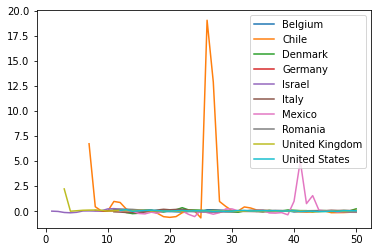

In [31]:
days_dimension.pct_change().plot()

In [32]:
from matplotlib import pyplot as plt

In [33]:
import matplotlib as mp

In [34]:
!conda list | grep alt

altair                    4.1.0                      py_1    conda-forge


In [35]:
import altair

In [36]:
# plt.styles.available

In [37]:
# days_dimension

Text(0.5, 1.0, 'Country per Day\n Vaccinations over 1000')

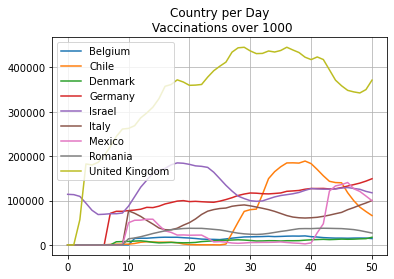

In [38]:
days_dimension.iloc[:,:-1].plot()
plt.grid(b=True,alpha=20.0)
plt.title('Country per Day\n Vaccinations over 1000')

In [39]:
final_df[['date','daily_vaccinations']][(final_df['country']=='Israel') & (final_df['people_fully_vaccinated']>1000)]

,date,daily_vaccinations
1760,2021-01-10,94053.0
1761,2021-01-11,77992.0
1762,2021-01-12,68443.0
1763,2021-01-13,69091.0
1764,2021-01-14,70269.0
1765,2021-01-15,70266.0
1766,2021-01-16,71821.0
1767,2021-01-17,87373.0
1768,2021-01-18,108633.0
1769,2021-01-19,130059.0


In [40]:
final_df[['date','daily_vaccinations']][(final_df['country']=='United States') & (final_df['people_fully_vaccinated']>200)]

,date,daily_vaccinations
3612,2021-01-14,747082.0
3613,2021-01-15,798707.0
3617,2021-01-19,911493.0
3618,2021-01-20,892403.0
3619,2021-01-21,913912.0
3620,2021-01-22,975540.0
3621,2021-01-23,1057387.0
3622,2021-01-24,1122182.0
3623,2021-01-25,1126251.0
3624,2021-01-26,1119058.0


In [41]:
final_df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
412,Belgium,2021-01-18,134407.0,134298.0,109.0,14538.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",678839.0,1630.0,611445.0,20435.0,39.0
413,Belgium,2021-01-19,153631.0,153341.0,290.0,15067.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",679771.0,932.0,611973.0,20472.0,37.0
414,Belgium,2021-01-20,174654.0,173942.0,712.0,15073.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",681250.0,1479.0,613181.0,20554.0,82.0
415,Belgium,2021-01-21,204483.0,203771.0,712.0,16080.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",684256.0,3006.0,616169.0,20572.0,18.0
416,Belgium,2021-01-22,233671.0,232928.0,743.0,16951.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",686827.0,2571.0,618532.0,20620.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3651,United States,2021-02-22,64177474.0,44138118.0,19438495.0,1446445.0,"Moderna, Pfizer/BioNTech",28829332.0,59624.0,9201798.0,513394.0,1378.0
3652,United States,2021-02-23,65032083.0,44544969.0,19882544.0,1401674.0,"Moderna, Pfizer/BioNTech",28902002.0,72670.0,9160072.0,515838.0,2444.0
3653,United States,2021-02-24,66464947.0,45237143.0,20607261.0,1454731.0,"Moderna, Pfizer/BioNTech",28977573.0,75571.0,9118705.0,518371.0,2533.0
3654,United States,2021-02-25,68274117.0,46074392.0,21555117.0,1505193.0,"Moderna, Pfizer/BioNTech",29056287.0,78714.0,9094502.0,520836.0,2465.0


In [42]:
# # Remember that X (date) will be the same as Y; Y will change. X is constant. Y = number of vaccines...and multiple countries
# days_country
# #X = final_df.date.to_list()
# X = pd.date_range(base, periods=51).tolist()
#X = [base - datetime.timedelta(days = number) for number in range (51)]
# X = pd.date_range(start='1/6/2021', end='2/25/2021')
# X = pd.to_numeric(X)
# X = list(map(lambda el: [el], X))

In [43]:
# import datetime
# base = datetime.datetime(2021, 1, 6)
# X

In [44]:
# y = days_dimension.Israel
# y

In [45]:
# # Picked features. They were the X and Y
# len(y)

In [46]:
# len(X)

In [47]:
#00:00:00 tells that this is a date. We want this!
# X

In [48]:
#days_dimension.to_csv("days_dimension.csv")

## Try models
1. x(input of index) = > days
1b. x(input of index and Israel) = > U.S.
2. x(country by target) => United States ~ Israel
3. x(European Countries) => United States  EU

In [49]:
days_dimension.head(10)

,Belgium,Chile,Denmark,Germany,Israel,Italy,Mexico,Romania,United Kingdom,United States
0,0.0,0.0,0.0,0.0,113950.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,113238.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,109323.0,0.0,0.0,0.0,56740.0,0.0
3,0.0,0.0,0.0,0.0,94053.0,0.0,0.0,0.0,182378.0,0.0
4,0.0,0.0,0.0,0.0,77992.0,0.0,0.0,0.0,180016.0,0.0
5,0.0,0.0,0.0,0.0,68443.0,0.0,0.0,0.0,185923.0,0.0
6,0.0,147.0,0.0,0.0,69091.0,0.0,0.0,0.0,201110.0,0.0
7,0.0,1135.0,0.0,71090.0,70269.0,0.0,0.0,0.0,221049.0,0.0
8,0.0,1625.0,7099.0,75711.0,70266.0,0.0,0.0,0.0,244356.0,0.0
9,0.0,1638.0,7487.0,75700.0,71821.0,0.0,0.0,0.0,260980.0,0.0


In [50]:
# Trained model via model.fit
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [51]:
len(days_dimension)

51

In [52]:
# list(days_dimension.index)

In [53]:
# Multivariant code
X=pd.DataFrame({'days':np.array(list(days_dimension.index)),
                'israel':days_dimension['Israel'].values
}
)
#     np.array(list(days_dimension.index)).reshape(-1,1)
X

,days,israel
0,0,113950.0
1,1,113238.0
2,2,109323.0
3,3,94053.0
4,4,77992.0
5,5,68443.0
6,6,69091.0
7,7,70269.0
8,8,70266.0
9,9,71821.0


In [54]:
# X days
X=np.array(list(days_dimension.index)).reshape(-1,1)

In [55]:
y=days_dimension['Chile']

In [56]:
X[0:-6]

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44]])

In [57]:
len(days_dimension)*.8

40.800000000000004

In [58]:
len(days_dimension)

51

In [59]:
days_split=10
X_train,X_test,y_train,y_test=X[0:-days_split],X[-days_split:],y[0:-days_split],y[-days_split:]

In [60]:
# X_test,X_train
starting_point=len(X_train)
len(X_train),len(y_test)

(41, 10)

In [61]:
model.fit(X_train, y_train)

LinearRegression()

In [62]:
model.coef_

array([4802.68745645])

In [63]:
help(model)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean

In [64]:
y_pred=model.predict(X_test)

In [65]:
def model_performance(y_test,y_pred,starting_point):
    index=range(starting_point,starting_point+days_split)
    df_eval=pd.DataFrame({'y_test':y_test.ravel(),'y_pred':y_pred},index=index)
    df_eval['error']=df_eval['y_test']-df_eval['y_pred']
    df_eval['error_rate']=round(df_eval['error']/df_eval['y_test'],2)
    return df_eval

In [66]:
eval_country=model_performance(y_test,y_pred,starting_point)

In [67]:
eval_country.head()

,y_test,y_pred,error,error_rate
41,169841.0,147234.192683,22606.807317,0.13
42,155721.0,152036.880139,3684.119861,0.02
43,143264.0,156839.567596,-13575.567596,-0.09
44,140421.0,161642.255052,-21221.255052,-0.15
45,139950.0,166444.942509,-26494.942509,-0.19


<AxesSubplot:ylabel='Density'>

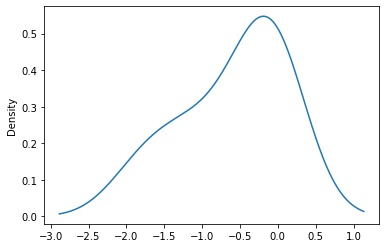

In [68]:
eval_country['error_rate'].plot(kind='kde')

In [69]:
Y_mx_b=model.predict(X_train)

In [70]:
Y_mx_b=pd.DataFrame({'y_line':Y_mx_b})

<AxesSubplot:>

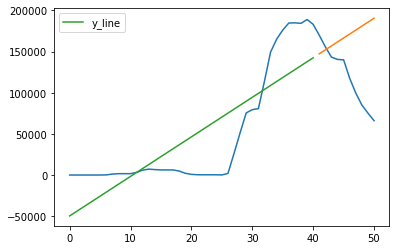

In [71]:
ax=days_dimension['Chile'].plot()
eval_country['y_pred'].plot(ax=ax)
Y_mx_b.plot(ax=ax)

<AxesSubplot:>

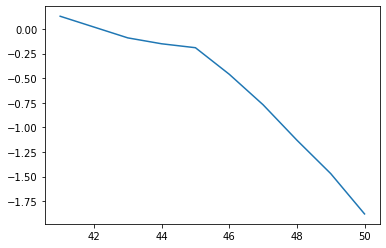

In [72]:
eval_country['error_rate'].plot()

In [73]:
# test = pd.to_numeric([datetime.datetime.today()])

In [74]:

#test[0]

In [75]:
# test = pd.to_numeric([datetime.datetime.today()])
# model.predict(test)

In [76]:
# X days
X=np.array(list(days_dimension.index)).reshape(-1,1)

In [77]:
y=days_dimension['Israel']

In [78]:
days_split=10
X_train,X_test,y_train,y_test=X[0:-days_split],X[-days_split:],y[0:-days_split],y[-days_split:]

In [79]:
# X_test,X_train
starting_point=len(X_train)
len(X_train),len(y_test)

(41, 10)

In [80]:
model.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred=model.predict(X_test)

In [82]:
eval_country2=model_performance(y_test,y_pred,starting_point)
eval_country2.head()

,y_test,y_pred,error,error_rate
41,126102.0,135877.723171,-9775.723171,-0.08
42,125533.0,136436.495122,-10903.495122,-0.09
43,125698.0,136995.267073,-11297.267073,-0.09
44,126035.0,137554.039024,-11519.039024,-0.09
45,128050.0,138112.810976,-10062.810976,-0.08


<AxesSubplot:ylabel='Density'>

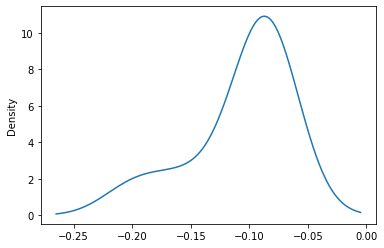

In [83]:
eval_country2['error_rate'].plot(kind='kde')

In [84]:
Y_mx_b2=model.predict(X_train)
Y_mx_b2=pd.DataFrame({'y_line':Y_mx_b2})

<AxesSubplot:>

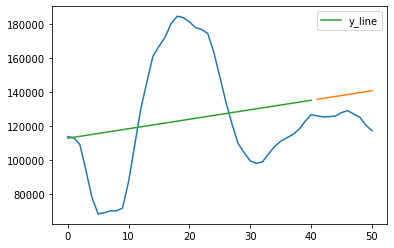

In [85]:
ax=days_dimension['Israel'].plot()
eval_country2['y_pred'].plot(ax=ax)
Y_mx_b2.plot(ax=ax)

<AxesSubplot:>

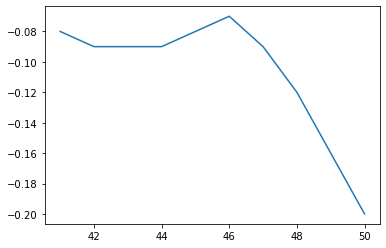

In [86]:
eval_country2['error_rate'].plot()

In [87]:
test = 1

<AxesSubplot:>

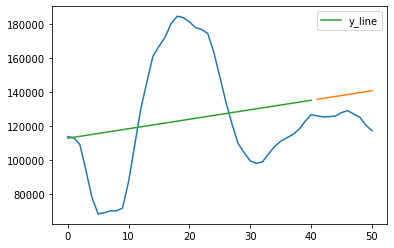

In [88]:
# X days
X=np.array(list(days_dimension.index)).reshape(-1,1)
y=days_dimension['Israel']
days_split=10
X_train,X_test,y_train,y_test=X[0:-days_split],X[-days_split:],y[0:-days_split],y[-days_split:]

# X_test,X_train
starting_point=len(X_train)
len(X_train),len(y_test)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

eval_country2=model_performance(y_test,y_pred,starting_point)
eval_country2.head()

Y_mx_b2=model.predict(X_train)
Y_mx_b2=pd.DataFrame({'y_line':Y_mx_b2})

ax=days_dimension['Israel'].plot()
eval_country2['y_pred'].plot(ax=ax)
Y_mx_b2.plot(ax=ax)

<AxesSubplot:ylabel='Density'>

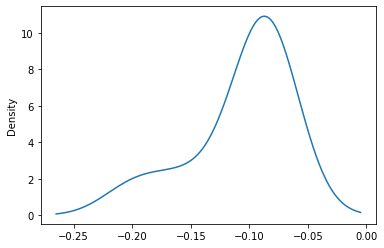

In [89]:
eval_country2['error_rate'].plot(kind='kde')


<AxesSubplot:>

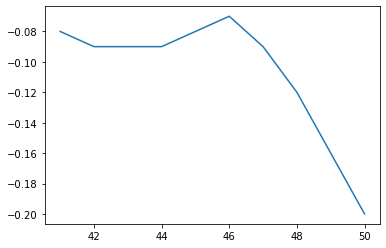

In [90]:
eval_country2['error_rate'].plot()

In [91]:
countries = days_dimension.columns.tolist()
countries

['Belgium',
 'Chile',
 'Denmark',
 'Germany',
 'Israel',
 'Italy',
 'Mexico',
 'Romania',
 'United Kingdom',
 'United States']

In [92]:
for country in countries:
    print(country)
    y=days_dimension[country]
    print (y)
    
    

Belgium
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11    14538.0
12    15067.0
13    15073.0
14    16080.0
15    16951.0
16    17389.0
17    17187.0
18    17224.0
19    16248.0
20    15546.0
21    14467.0
22    13136.0
23    12602.0
24    12462.0
25    11948.0
26    13457.0
27    15248.0
28    16597.0
29    17948.0
30    18218.0
31    18535.0
32    18843.0
33    19348.0
34    18755.0
35    19160.0
36    19699.0
37    19984.0
38    19813.0
39    20296.0
40    18567.0
41    17742.0
42    16456.0
43    15797.0
44    15335.0
45    15353.0
46    15052.0
47    15437.0
48    15526.0
49    15388.0
50    14286.0
Name: Belgium, dtype: float64
Chile
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6        147.0
7       1135.0
8       1625.0
9       1638.0
10      1638.0
11      3215.0
12      5975.0
13      7158.0
14      6607.0
15      6176.0
16

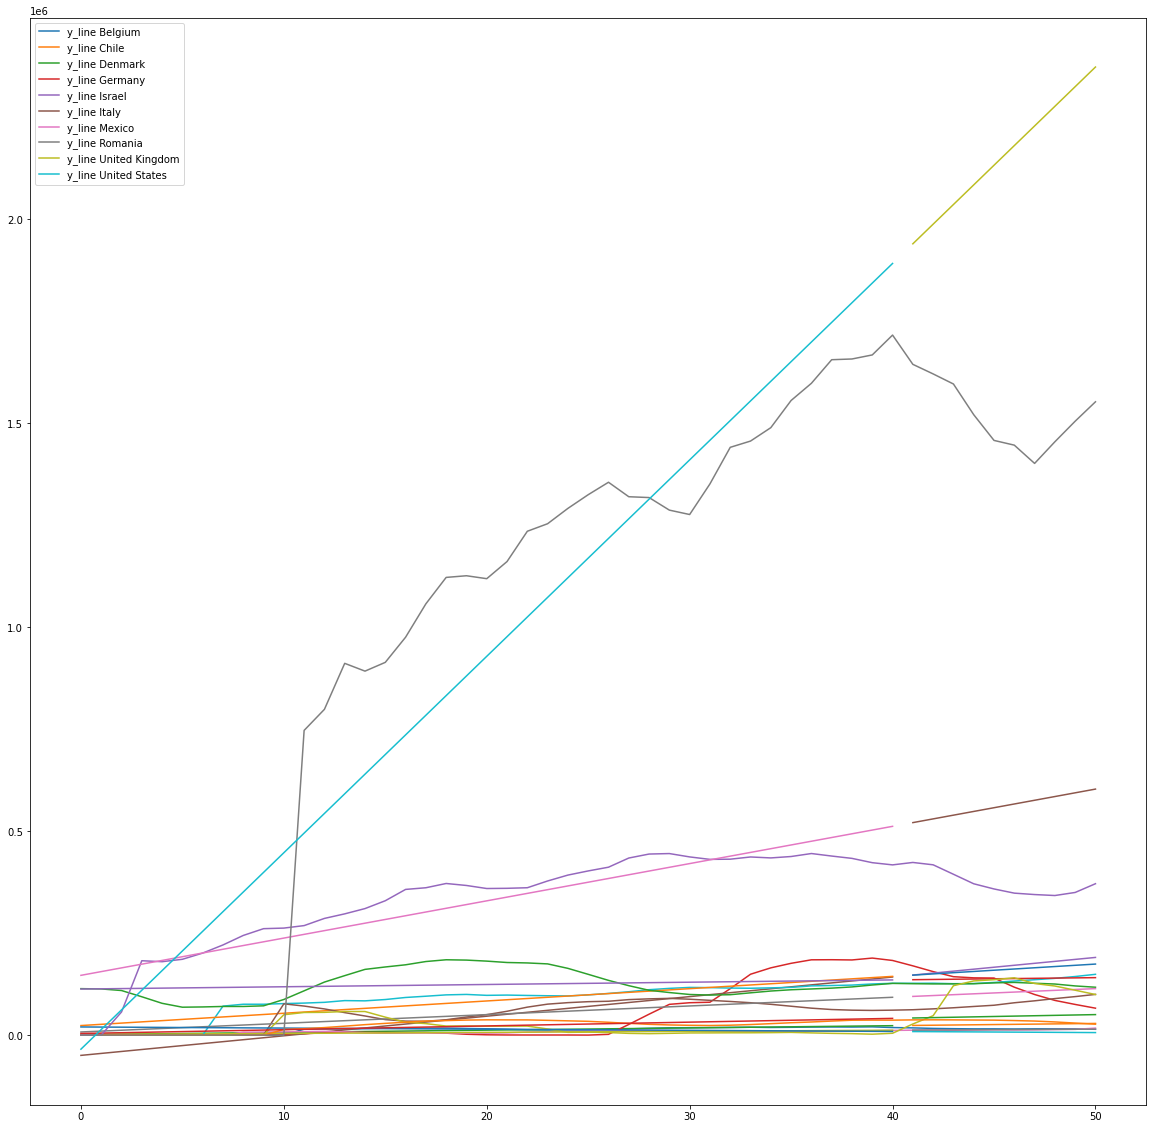

In [93]:
for country in countries:
    #print(country)
    
    #Calculate X and y
    X=np.array(list(days_dimension.index)).reshape(-1,1)
    y=days_dimension[country]
    
    #Calculate Trainig and Test Split
    days_split=10
    X_train,X_test,y_train,y_test=X[0:-days_split],X[-days_split:],y[0:-days_split],y[-days_split:]

    # X_test,X_train
    starting_point=len(X_train)
    len(X_train),len(y_test)
    
    #Fit the Model
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    eval_country3=model_performance(y_test,y_pred,starting_point)
    eval_country3.head()

    Y_mx_b3=model.predict(X_train)
    Y_mx_b3=pd.DataFrame({'y_line '+country:Y_mx_b3})

    ax=days_dimension[country].plot(figsize = (20,20))
    eval_country3['y_pred'].plot(ax=ax)
    Y_mx_b3.plot(ax=ax);
    #df.plot(figsize=(10,10));

In [94]:
import seaborn as sns

C:\users\zarre\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='United States', ylabel='Density'>

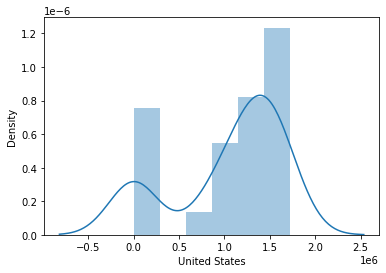

In [95]:
sns.distplot(days_dimension['United States'])

In [108]:
countries = days_dimension.columns

C:\users\zarre\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\users\zarre\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\users\zarre\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

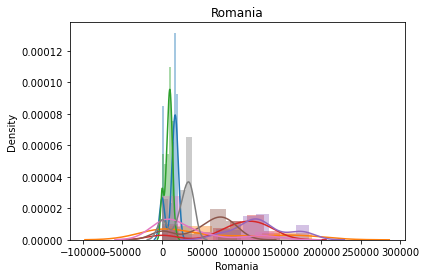

In [97]:
for c in days_dimension.columns[0:-2]:
    sns.distplot(days_dimension[c])
    plt.title(c)

In [98]:
for c in days_dimension.columns[0:]:
    if days_dimension[c].std() >100000.0:
        print("Larger Pops")
        print(f"{c} -> Std Deviation: {days_dimension[c].std():,.2f} Median: {days_dimension[c].median():,.2f}")
    elif (days_dimension[c].std() >30000.0) & (days_dimension[c].std() <100000.0):
        print("Medium Pops")
        print(f"{c} -> Std Deviation: {days_dimension[c].std():,.2f} Median: {days_dimension[c].median():,.2f}")
    else:
        print("Other")
        print(f"{c} -> Std Deviation: {days_dimension[c].std():,.2f} Median: {days_dimension[c].median():,.2f}")

Other
Belgium -> Std Deviation: 7,095.26 Median: 15,388.00
Medium Pops
Chile -> Std Deviation: 71,159.32 Median: 6,607.00
Other
Denmark -> Std Deviation: 4,379.05 Median: 9,024.00
Medium Pops
Germany -> Std Deviation: 42,110.23 Median: 99,771.00
Medium Pops
Israel -> Std Deviation: 32,780.65 Median: 121,242.00
Medium Pops
Italy -> Std Deviation: 31,698.93 Median: 64,383.00
Medium Pops
Mexico -> Std Deviation: 43,493.01 Median: 6,773.00
Other
Romania -> Std Deviation: 13,680.94 Median: 29,526.00
Larger Pops
United Kingdom -> Std Deviation: 110,755.06 Median: 361,343.00
Larger Pops
United States -> Std Deviation: 598,729.80 Median: 1,287,147.00


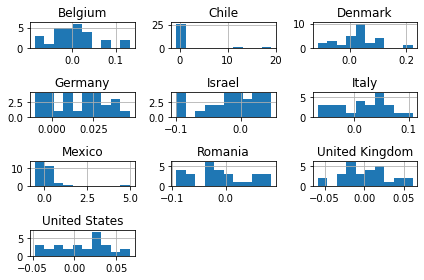

In [99]:
days_dimension.pct_change().dropna()[12:].hist()
plt.tight_layout()

In [100]:
from sklearn.preprocessing import StandardScaler

In [109]:
countries

Index(['Belgium', 'Chile', 'Denmark', 'Germany', 'Israel', 'Italy', 'Mexico',
       'Romania', 'United Kingdom', 'United States'],
      dtype='object')

In [101]:
# Linear Regression: your data could be or not be LINEAR, your output NEEDS to be linear(continuous)
# logistic regression: your data could be or not be LINEAR, your output NEEDS to be discrete(non-continous)
# log continued: you are using a sigmoid function to turn ranges (-212121 to 0 -> 0, anything over 1 up inf is 1)

Belgium
Chile
Denmark
Germany
Israel
Italy
Mexico
Romania
United Kingdom
United States


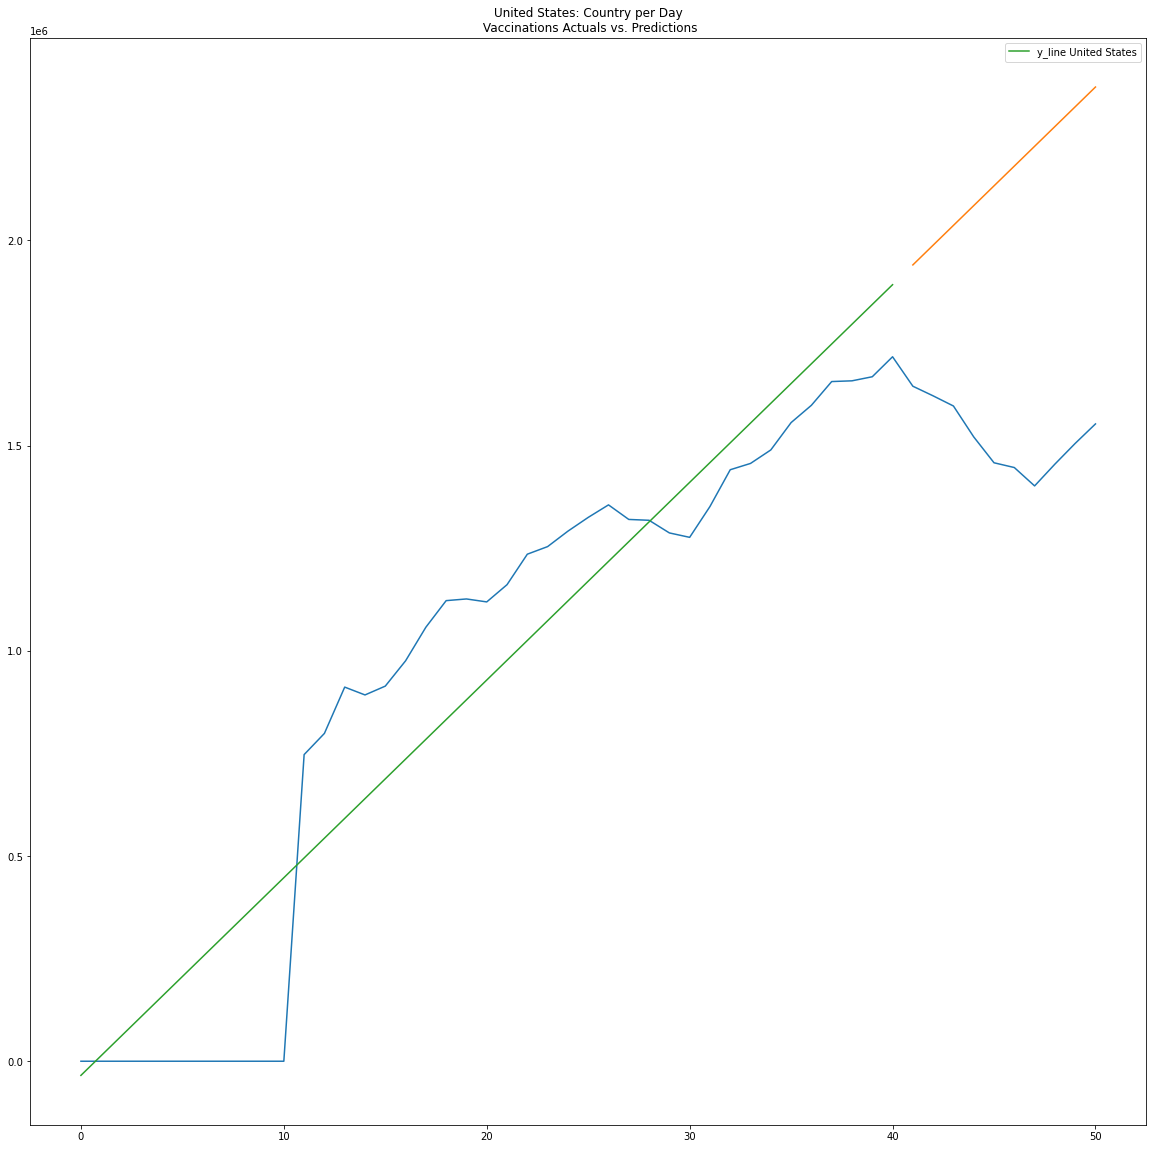

In [110]:
# Model vs. Actual

#Save plots for every country as image
for country in countries:
    #print(country)
    
    #Calculate X and y
    X=np.array(list(days_dimension.index)).reshape(-1,1)
    y=days_dimension[country]
    
    #Calculate Trainig and Test Split
    days_split=10
    X_train,X_test,y_train,y_test=X[0:-days_split],X[-days_split:],y[0:-days_split],y[-days_split:]

    # X_test,X_train
    starting_point=len(X_train)
    len(X_train),len(y_test)
    
    #Fit the Model
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    eval_country3=model_performance(y_test,y_pred,starting_point)
    eval_country3.head()

    Y_mx_b3=model.predict(X_train)
    Y_mx_b3=pd.DataFrame({'y_line '+country:Y_mx_b3})
    
    plt.clf() #clear graph for every country to come up with one graph per country
    ax=days_dimension[country].plot(figsize = (20,20))
    eval_country3['y_pred'].plot(ax=ax)
    fig = Y_mx_b3.plot(ax=ax)
    plt.title(f"{country}: Country per Day\n Vaccinations Actuals vs. Predictions")
    plt.savefig(f"{country}.png");
     
    
    #eval_country2['error_rate'].plot(kind='kde')
  

Belgium
Chile
Denmark
Germany
Israel
Italy
Mexico
Romania
United Kingdom
United States


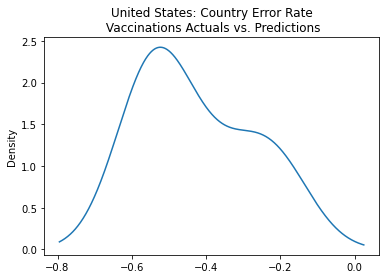

In [116]:
# Error Plots

#Save plots for every country as image
for country in countries:
    #print(country)
    
    #Calculate X and y
    X=np.array(list(days_dimension.index)).reshape(-1,1)
    y=days_dimension[country]
    
    #Calculate Trainig and Test Split
    days_split=10
    X_train,X_test,y_train,y_test=X[0:-days_split],X[-days_split:],y[0:-days_split],y[-days_split:]

    # X_test,X_train
    starting_point=len(X_train)
    len(X_train),len(y_test)
    
    #Fit the Model
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    eval_country3=model_performance(y_test,y_pred,starting_point)
    

    Y_mx_b3=model.predict(X_train)
    Y_mx_b3=pd.DataFrame({'y_line '+country:Y_mx_b3})
    
    plt.clf() #clear graph for every country to come up with one graph per country
    eval_country3['error_rate'].plot(kind='kde')
    plt.title(f"{country}: Country Error Rate\n Vaccinations Actuals vs. Predictions")
    plt.savefig(f"{country}-error_rate.png");

In [123]:
final_df.to_csv("final_df.csv")

In [122]:
days_dimension.to_csv("days_dimension.csv")

### Multivariante

In [126]:
# Multivariant code
X_mv=pd.DataFrame(
    {'days':np.array(list(days_dimension.index)),
    'israel':days_dimension['Israel'].values
    })

X_mv.head()

,days,israel
0,0,113950.0
1,1,113238.0
2,2,109323.0
3,3,94053.0
4,4,77992.0


In [127]:
y_mv=days_dimension['United States']

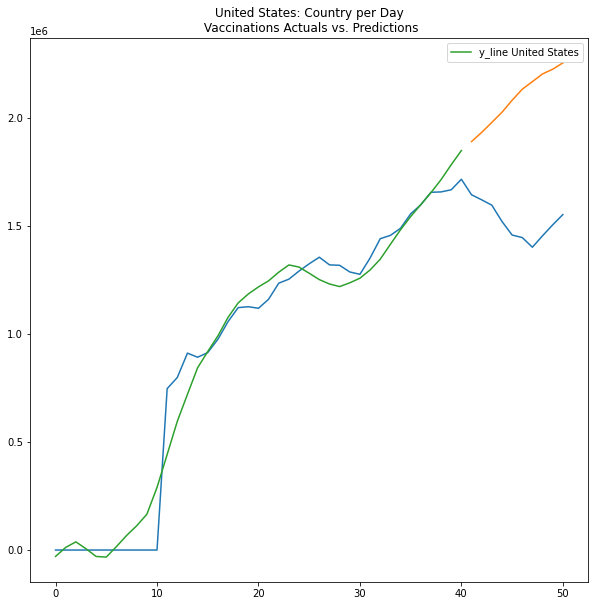

In [131]:
    #Calculate Trainig and Test Split
    days_split=10
    X_train,X_test,y_train,y_test=X_mv[0:-days_split],X_mv[-days_split:],y_mv[0:-days_split],y_mv[-days_split:]

    # X_test,X_train
    starting_point=len(X_train)
    len(X_train),len(y_test)
    
    #Fit the Model
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    eval_country4=model_performance(y_test,y_pred,starting_point)
    eval_country4.head()

    Y_mx_b4=model.predict(X_train)
    Y_mx_b4=pd.DataFrame({'y_line '+country:Y_mx_b4})
    
    plt.clf() #clear graph for every country to come up with one graph per country
    ax=days_dimension[country].plot(figsize = (10,10))
    eval_country4['y_pred'].plot(ax=ax)
    fig = Y_mx_b4.plot(ax=ax)
    plt.title(f"{country}: Country per Day\n Vaccinations Actuals vs. Predictions")
    plt.savefig(f"{country}.png");

In [134]:
country2 = "Mexico"

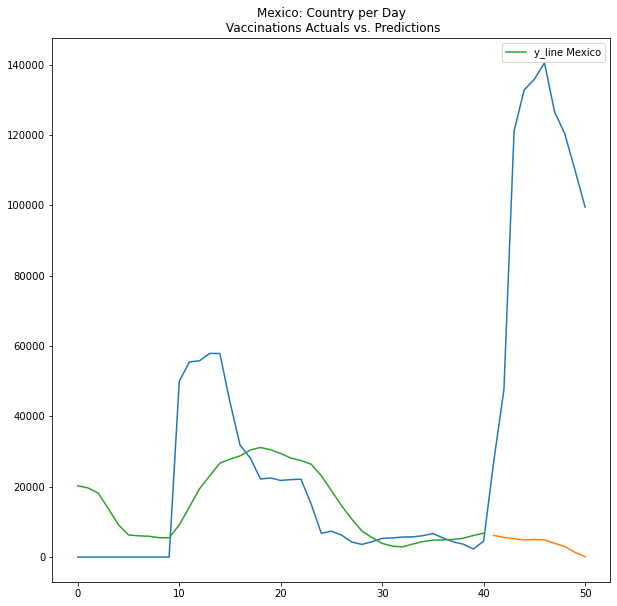

In [136]:
# Multivariant code
X_mv2=pd.DataFrame(
    {'days':np.array(list(days_dimension.index)),
    'israel':days_dimension['Israel'].values
    })

X_mv2.head()
y_mv2=days_dimension['Mexico']

#Calculate Trainig and Test Split
days_split=10
X_train,X_test,y_train,y_test=X_mv2[0:-days_split],X_mv2[-days_split:],y_mv2[0:-days_split],y_mv2[-days_split:]

# X_test,X_train
starting_point=len(X_train)
len(X_train),len(y_test)

#Fit the Model
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

eval_country5=model_performance(y_test,y_pred,starting_point)
eval_country5.head()

Y_mx_b5=model.predict(X_train)
Y_mx_b5=pd.DataFrame({'y_line '+country2:Y_mx_b5})

plt.clf() #clear graph for every country to come up with one graph per country
ax=days_dimension[country2].plot(figsize = (10,10))
#ax=days_dimension['Mexico'].plot()
eval_country5['y_pred'].plot(ax=ax)
Y_mx_b5.plot(ax=ax)
plt.title(f"{country2}: Country per Day\n Vaccinations Actuals vs. Predictions")
plt.savefig(f"{country2}.png");